### UPVOTE, if you like :)

* **1 Introduction**
* **2 Load and check data**
    * 2.1 load data
    * 2.2 check for null and missing values
    * 2.3 Outlier detection
* **3 Feature analysis**
    * 3.1 Numerical values
    * 3.2 Categorical values
* **4 Filling missing Values**
* **5 Modeling**

# Introduction

Hello all! In this kernel, we will be going through Exploratory Data Analysis of different features of the dataset, and Predict whether the particular person will be having a **Diabetes** or not!

Being a beginner in building an interactive Kernels, please if you get doubt in any code, raise a question in the comments box below...

# Load and Check Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [ ]:
data = pd.read_csv('../input/diabetes.csv')
data.head()

In [ ]:
pandas_profiling.ProfileReport(data)

We have got our data!!!

In [ ]:
data.shape

### Null/Missing values

In [ ]:
data.isnull().sum()

No NULL values exist! Thats a good news...

### Outlier Detection

In [ ]:
# O1 = Q1-1.5(IQR) -> 0.082-(1.5*3.6)
# O2 = Q3+1.5(IQR) -> 3.67+(1.5*3.6) =9
data2=data.copy()
del data2['Outcome']
for i in range(8):
    col=data2.columns[i]
    q3, q1 = np.percentile(data2[col], [75,25])
    iqr = q3 - q1
    o1=q1-1.5*iqr
    o2=q3+1.5*iqr
    lis=[]
    for j in range(768):
        if data2['{}'.format(col)][j]<=o2 and data['{}'.format(col)][j]>=o1:
            lis.append(data2[col][j])
    print("Outliers {} ->".format(col),768-len(lis))

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='magma')

In [ ]:
sns.countplot('Outcome',data=data)

# Feature Analysis

## Numerical Data

In [ ]:
data.describe()

In [ ]:
data.info()

### Glucose

**Having 5 Outliers**

In [ ]:
sns.boxplot('Outcome','Glucose',data=data)

In [ ]:
sns.catplot('Glucose','Insulin',data=data,hue='Outcome')

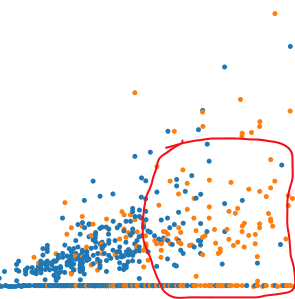

> Clearly, we can see that, a person with High level of Glucose, but having a approximate 0 insulin level, will be a Diabetic patient (most probably)

In [ ]:
# O1 = Q1-1.5(IQR) -> 0.082-(1.5*3.6)
# O2 = Q3+1.5(IQR) -> 3.67+(1.5*3.6) =9
data3=data[['Glucose']]
for i in range(1):
    col=data3.columns[i]
    q3, q1 = np.percentile(data3[col], [75,25])
    iqr = q3 - q1
    o1=q1-1.5*iqr
    o2=q3+1.5*iqr
    lis=[]
    mean=np.mean(data[col])
    for j in range(506):
        if data3['{}'.format(col)][j]>o2 or data3['{}'.format(col)][j]<o1:
            data[col][j]=mean

You can check that, Now there is no **Outliers** left for 'Glucose' column!

### Blood Pressure

In [ ]:
sns.boxplot('Outcome','BloodPressure',data=data)

In [ ]:
sns.jointplot('BloodPressure','Insulin',data=data,kind='kde',color='red')

From SME, we came to know that, If insulin is low, and patient is Diabetic --> BP will be **HIGH**
<br>No other relation exist between, Insulin and BP...

In [ ]:
g=sns.catplot('BloodPressure','SkinThickness',data=data,kind='strip',hue='Outcome',legend_out=False)
g.fig.set_size_inches(15,6)

Higher BP, no matter what the skinthickness is, Most probably patient will be a diabetic one...

**More** skinthickness, will also be leading to **Diabetes**

In [ ]:
sns.regplot('BloodPressure','SkinThickness',data=data,marker='*',color='red')

Linear trend!!! But nothing surprising about it...

In [ ]:
g=sns.catplot('BloodPressure','Age',data=data,hue='Outcome',kind='point',legend_out=False)
g.fig.set_size_inches(15,6)

*People having same BP, but of greater age, are More prone to Diabetes*

### SkinThickness

In [ ]:
g=sns.relplot('SkinThickness','Insulin',data=data,kind='line',hue='Outcome')
g.fig.set_size_inches(15,6)

Transparent graph is showing the Variance in the Outcome, related to both of above mentioned variables...

In [ ]:
sns.boxenplot('Outcome','SkinThickness',data=data)

### Insulin

In [ ]:
g=sns.relplot('Insulin','DiabetesPedigreeFunction',data=data,kind='scatter',hue='Outcome')
g.fig.set_size_inches(15,6)

Low DPF, Low Insulin(not zero) --> Outcome-0 (most probably)<br>
High DPF, Low Insulin --> Outcome-1 (most probably)<br>
Low DPF, High Insulin --> Outcome-1 (most probably)<br>
High DPF, High Insulin --> Outcome-0 (most probably)

In [ ]:
sns.jointplot('Insulin','DiabetesPedigreeFunction',kind='kde',color='y',data=data)

### BMI

In [ ]:
sns.violinplot('Outcome','BMI',data=data,bw='scott',scale='area',split=False,inner='quartile')

In [ ]:
data.head()

### Removing Zeros...

In [ ]:
data['BloodPressure'] = np.where(data['BloodPressure']==0, data['BloodPressure'].mean(), data['BloodPressure'])
data['BMI'] = np.where(data['BMI']==0, data['BMI'].mean(), data['BMI'])
data['Insulin'] = np.where(data['Insulin']==0, data['Insulin'].mean(), data['Insulin'])
data['SkinThickness'] = np.where(data['SkinThickness']==0, data['SkinThickness'].mean(), data['SkinThickness'])

## Machine Learning

In [ ]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
'''from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
params = {
     'learning_rate': [0.05,0.06],
     'n_estimators': [1000,1100],
     'max_depth':[7,8],
     'reg_alpha':[0.3,0.4,0.5]
    }
 
# Initializing the XGBoost Regressor
xgb_model = XGBClassifier()
 
# Gridsearch initializaation
gsearch = GridSearchCV(xgb_model, params,
                    verbose=True,
                    cv=10,
                    n_jobs=-1)
gsearch.fit(X,y) 
#Printing the best chosen params
print(gsearch.best_params_)'''

In [ ]:
import xgboost
from xgboost import XGBClassifier
rfc= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.06, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)
y_pred_prob=rfc.predict_proba(X_test)

In [ ]:
y_pred_prob=y_pred_prob[:,1]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.grid(True)
